In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, chi2, poisson, norm, uniform
from tictoc import tic, toc

Genero numeri random che seguono una distribuzione uniforme in [a, b]

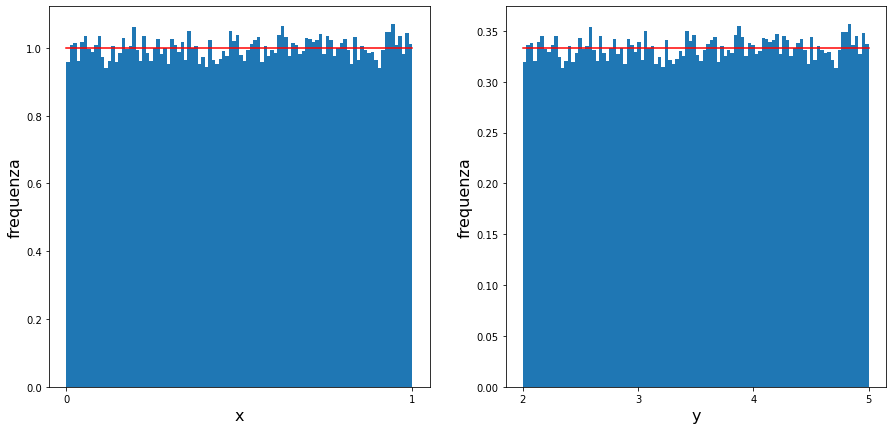

In [3]:
a = 2
b = 5
n = 100000
x = np.random.rand(n)
y = a + (b-a)*x
xr = np.linspace(0, 1, 100)
yr = np.linspace(a, b, 100)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

ax[0].hist(x, 100, density=True)
ax[0].plot(xr, uniform.pdf(xr, 0, 1), 'r-')
ax[0].set_xlabel('x', fontsize=16)
ax[0].set_ylabel('frequenza', fontsize=16)
ax[0].set_xticks(range(0, 2))

ax[1].hist(y, 100, density=True)
ax[1].plot(yr, uniform.pdf(yr, a, b-a), 'r-')
ax[1].set_xlabel('y', fontsize=16)
ax[1].set_ylabel('frequenza', fontsize=16)
ax[1].set_xticks(range(a, b+1))

plt.show()

Genero dei numeri che seguono una distribuzione di tipo esponenziale

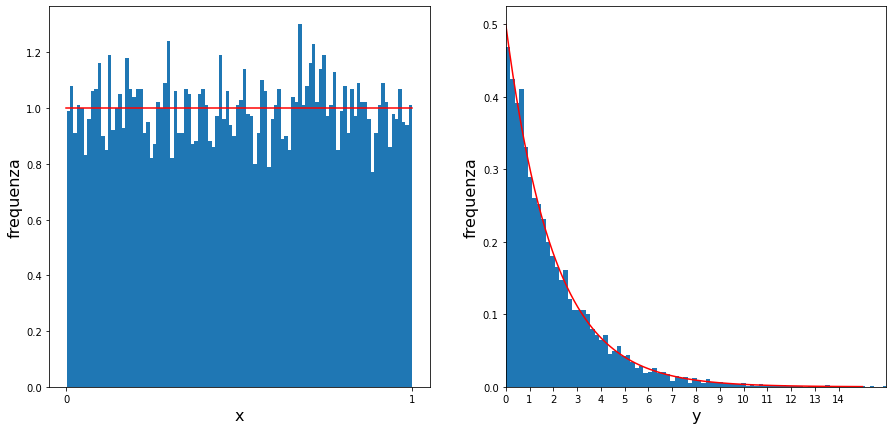

In [6]:
la = 0.5
n = 10000
x = np.random.rand(n)
y = - np.log(x)/la
xr = np.linspace(0, 1, 100)
yr = np.linspace(0, 15, 100)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

ax[0].hist(x, 100, density=True)
ax[0].plot(xr, uniform.pdf(xr, 0, 1), 'r-')
ax[0].set_xlabel('x', fontsize=16)
ax[0].set_ylabel('frequenza', fontsize=16)
ax[0].set_xticks(range(0, 2))

ax[1].hist(y, 100, density=True)
ax[1].plot(yr, expon.pdf(yr, 0, 1/la), 'r-')
ax[1].set_xlabel('y', fontsize=16)
ax[1].set_ylabel('frequenza', fontsize=16)
ax[1].set_xticks(range(0, 15))
ax[1].set_xlim([0, 16])

plt.show()

Genero numeri distribuiti secondo Poisson

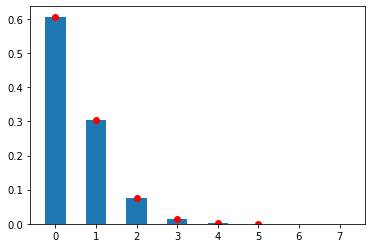

0:00:02.909532


In [16]:
tic()
N = 0
S = 0
yd = np.array(range(0, 6))
ns = 1000000
ps = np.zeros(ns)

for i in range(0, ns):
    while(S < 1):
        N = N+1
        S = S - np.log(np.random.rand())/la
    ps[i] = N
    S = 0
    N = 0
#print(np.sum(ps == 1))
F = np.unique(ps, return_counts = True)

plt.bar(F[0]-1, F[1]/ns, width=0.5, align='center')
#plt.hist(ps-1, 100, density=True)
plt.plot(yd, poisson.pmf(yd,0.5), 'ro')
plt.show()
toc()

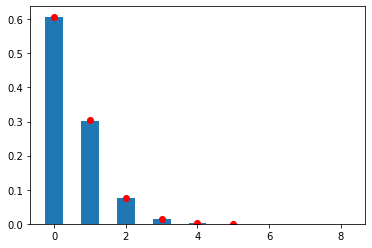

0:00:02.241957


In [15]:
tic()
ns = 1000000
la = 0.5

# Generazione dei numeri casuali necessari
y = -np.log(np.random.rand(ns, 100)) / la  # Assumi un limite superiore al numero massimo di iterazioni richieste
S = np.cumsum(y, axis=1)


# Trova il primo indice dove la somma cumulativa supera 1
N = np.argmax(S >= 1, axis=1)

# Calcolo delle frequenze
F = np.unique(N, return_counts=True)

# Grafico
yd = np.arange(0, 6)
plt.bar(F[0], F[1] / ns, width=0.5, align='center')
plt.plot(yd, poisson.pmf(yd, 0.5), 'ro')
plt.show()
toc()

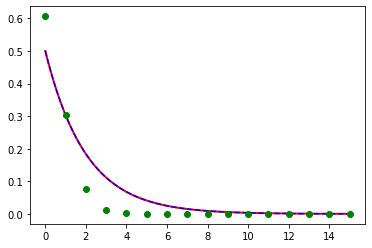

In [17]:
yr = np.linspace(0, 15, 100)
yd = np.array(range(0, 16))

plt.plot(yr, expon.pdf(yr, 0, 2), 'r-', linewidth=2)
plt.plot(yr, chi2.pdf(yr, 2), 'b--', linewidth=1.5)
plt.plot(yd, poisson.pmf(yd, 0.5), 'go', linewidth=1.5)

plt.show()

Genero dei numeri distribuiti secondo una normale

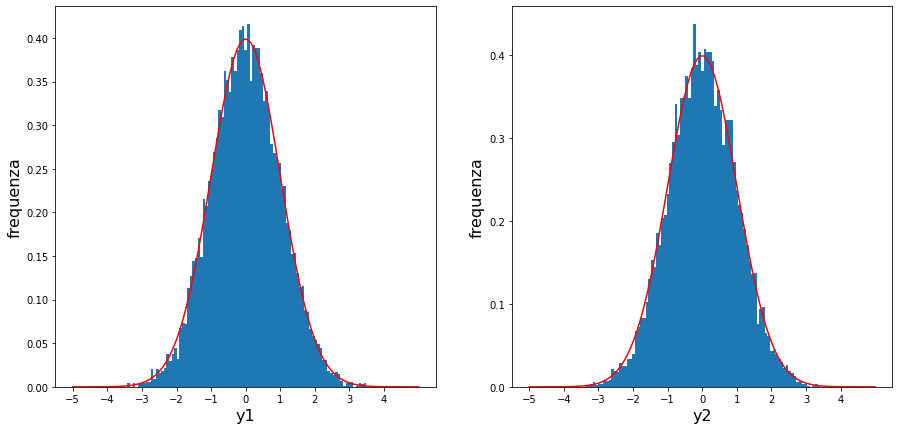

In [18]:
la = 0.5
n = 10000
x1 = np.random.rand(n)
x2 = np.random.rand(n)

y1 = np.sqrt(- np.log(x1)/la)*np.cos(2*np.pi*x2)
y2 = np.sqrt(- np.log(x1)/la)*np.sin(2*np.pi*x2)

xr = np.linspace(0, 1, 100)
yr = np.linspace(-5, 5, 100)


fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))

ax[0].hist(y1, 100, density=True)
ax[0].plot(yr, norm.pdf(yr, 0, 1), 'r-')
ax[0].set_xlabel('y1', fontsize=16)
ax[0].set_ylabel('frequenza', fontsize=16)
ax[0].set_xticks(range(-5, 5))

ax[1].hist(y2, 100, density=True)
ax[1].plot(yr, norm.pdf(yr, 0, 1), 'r-')
ax[1].set_xlabel('y2', fontsize=16)
ax[1].set_ylabel('frequenza', fontsize=16)
ax[1].set_xticks(range(-5, 5))

plt.show()

Genero numeri distribuiti secondo una normale standard utilizzando il metodo del rigetto

['1.077391945923564' '0.7380979362857873' '-0.5330199687727868' ...
 '-0.1537281971396789' '-0.03183801257281349' '0.5266355007944998']
[ 1.07739195  0.73809794 -0.53301997 ... -0.1537282  -0.03183801
  0.5266355 ]


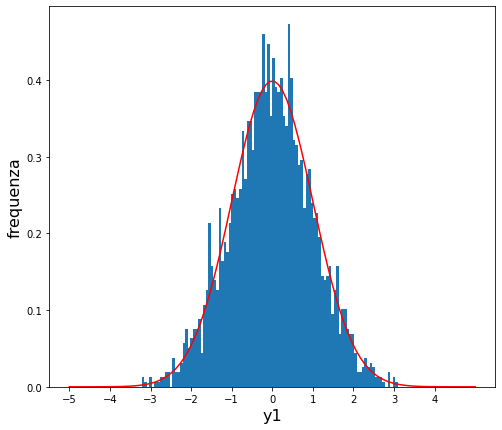

In [21]:
a = -5
b = 5
n = 10000
M = 1/np.sqrt(2*np.pi)

def gauss(x):
    return np.exp(-0.5*(x**2))/np.sqrt(2*np.pi) 

x1 = np.random.rand(n)
csi = a + (b-a)*x1

x2 = np.random.rand(n)
eta = M*x2


y = np.where(eta <= gauss(csi), csi, 'elimina')
y = y[y != 'elimina']
print(y)
y = np.array(y, dtype=float)
print(y)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 7))

yr = np.linspace(-5, 5, 100)

ax.hist(y, 100, density=True)
ax.plot(yr, norm.pdf(yr, 0, 1), 'r-')
ax.set_xlabel('y1', fontsize=16)
ax.set_ylabel('frequenza', fontsize=16)
ax.set_xticks(range(-5, 5))

plt.show()